In [141]:
import pandas as pd
import numpy as np
from scipy import stats as sts
from matplotlib import pyplot as plt

In [74]:
happy_data = pd.read_csv('Resources/happiness-cantril-ladder.csv')
anxiety_data = pd.read_csv('Resources/number-with-anxiety-disorders.csv')
drinks_data = pd.read_csv('Resources/drinks_solution.csv')
wine_data = pd.read_csv('Resources/Wine Production By Country.csv', delimiter=';')

In [75]:
wine_data.head()

,Country,wine_unit,Year
0,France,4293466,2013
1,Italy,4107370,2013
2,United States,3217000,2013
3,Spain,3200000,2013
4,Chile,1832000,2013


In [73]:
drinks_data = drinks_data.rename(columns={'country':'Entity'})
combined_df = pd.merge(happy_data, anxiety_data, on=['Entity','Code'], how='outer')
combined_df = combined_df.dropna()
combined_df = combined_df.rename(columns={'Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)': 'num_males_with_anxiety'})
combined_df = combined_df.rename(columns={'Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number)': 'num_females_with_anxiety'})
combined_df = combined_df.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2019)': 'happy_score'})

combined_df.head()

,Entity,Code,Year_x,happy_score,Year_y,num_males_with_anxiety,num_females_with_anxiety
0,Afghanistan,AFG,2008.0,3.72359,1990.0,164475.899445,252379.267264
1,Afghanistan,AFG,2008.0,3.72359,1991.0,170087.377635,262036.445129
2,Afghanistan,AFG,2008.0,3.72359,1992.0,199894.632147,310572.487808
3,Afghanistan,AFG,2008.0,3.72359,1993.0,231159.684414,361936.608315
4,Afghanistan,AFG,2008.0,3.72359,1994.0,238886.225430,376216.938911


In [116]:
combined_df = combined_df[combined_df['Year_y'] > 2007]
male_anxiety_prev = combined_df['num_males_with_anxiety']
female_anxiety_prev = combined_df['num_females_with_anxiety']

combined_df.head()
# country_group = combined_df.groupby(['Entity'])
# df = country_group.mean()

# df.head()

,Entity,Code,Year_x,happy_score,Year_y,num_males_with_anxiety,num_females_with_anxiety
18,Afghanistan,AFG,2008.0,3.72359,2008.0,386270.282078,582400.266576
19,Afghanistan,AFG,2008.0,3.72359,2009.0,401638.384398,603707.850083
20,Afghanistan,AFG,2008.0,3.72359,2010.0,419893.836128,629540.743682
21,Afghanistan,AFG,2008.0,3.72359,2011.0,440847.831534,659739.339468
22,Afghanistan,AFG,2008.0,3.72359,2012.0,458964.821722,686651.273894


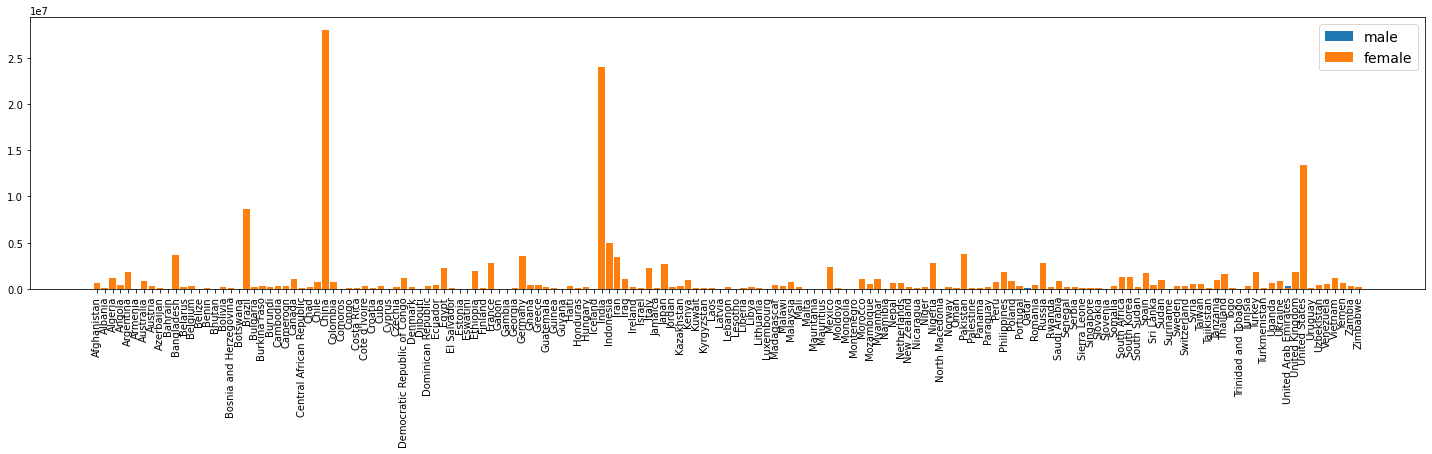

In [68]:
f, ax = plt.subplots(figsize=(25,5))
plt.bar(df.index, df['num_males_with_anxiety'], label='male')
plt.bar(df.index, df['num_females_with_anxiety'], label='female')
plt.xticks(rotation=90)
ax.legend(fontsize=14)
plt.show()

In [101]:
happy_data.head()
country_year_happy = happy_data.groupby(['Entity', 'Year'])
grouped_happy_data = country_year_happy.mean()
grouped_happy_data = happy_data.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2019)': 'happy_rating'})
grouped_happy_data

happy_rating
Entity      Year              
Afghanistan 2008      3.723590
            2009      4.401778
            2010      4.758381
            2011      3.831719
            2012      3.782938
...                        ...
Zimbabwe    2014      4.184451
            2015      3.703191
            2016      3.735400
            2017      3.638300
            2018      3.616480

[1704 rows x 1 columns]

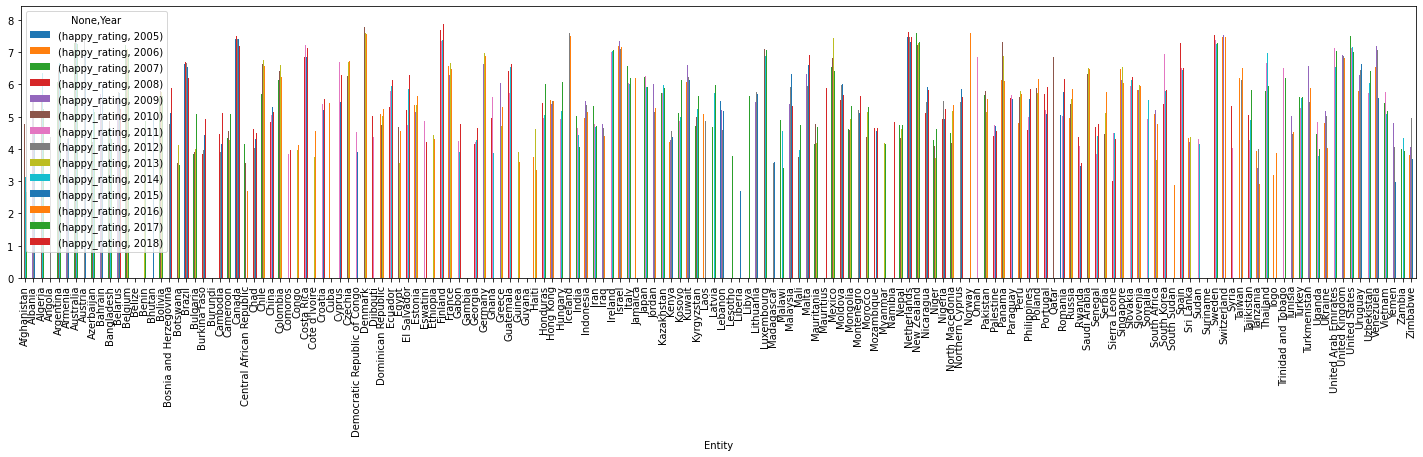

In [105]:
grouped_happy_data.unstack().plot(kind='bar', figsize=(25,5))

In [108]:
drinks_data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.3
4,Angola,217,57,45,5.7


In [130]:
country_happy = happy_data.groupby('Entity')
df = country_happy.mean()
df['country'] = df.index
df.index = np.arange(len(df))
df

,happy_rating,country
0,3.705495,Afghanistan
1,4.990211,Albania
2,5.481872,Algeria
3,4.420299,Angola
4,6.358951,Argentina
...,...,...
159,6.203183,Venezuela
160,5.293443,Vietnam
161,3.886234,Yemen
162,4.631722,Zambia


In [134]:
drinks_data
happy_servings_df = pd.merge(df, drinks_data, on='country', how='inner')
happy_servings_df

,happy_rating,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,3.705495,Afghanistan,0,0,0,0.0
1,4.990211,Albania,89,132,54,4.9
2,5.481872,Algeria,25,0,14,0.7
3,4.420299,Angola,217,57,45,5.7
4,6.358951,Argentina,193,25,221,7.8
...,...,...,...,...,...,...
145,6.203183,Venezuela,333,100,3,7.7
146,5.293443,Vietnam,111,2,1,2.0
147,3.886234,Yemen,6,0,0,0.1
148,4.631722,Zambia,32,19,4,1.0


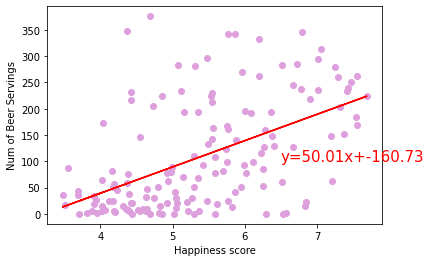

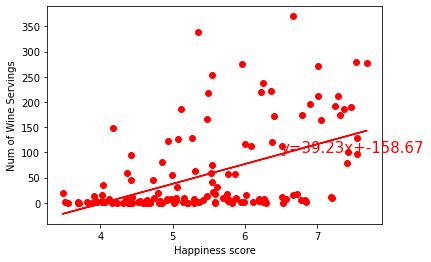

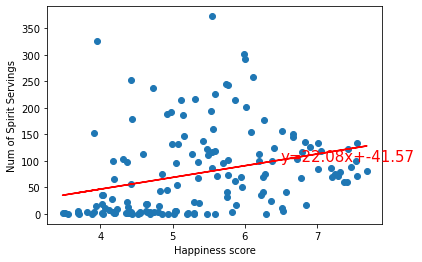

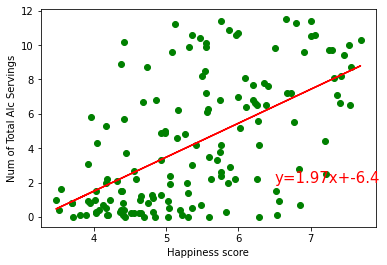

In [155]:
plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['beer_servings'], c='plum')
x = happy_servings_df['happy_rating']
y = happy_servings_df['beer_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,100), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Beer Servings')
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['wine_servings'], c='red')
y = happy_servings_df['wine_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,100), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Wine Servings')
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['spirit_servings'])
y = happy_servings_df['spirit_servings']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,100), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Spirit Servings')
plt.show()

plt.scatter(happy_servings_df['happy_rating'], happy_servings_df['total_litres_of_pure_alcohol'], c='green')
y = happy_servings_df['total_litres_of_pure_alcohol']
slope, intercept, r_value, p_value, std_err = sts.linregress(x, y)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
reg_str = 'y='+ str(round(slope, 2)) +'x+' + str(round(intercept, 2))
plt.annotate(reg_str, (6.5,2), fontsize=15, color='red' )
plt.xlabel('Happiness score')
plt.ylabel('Num of Total Alc Servings')
plt.show()